In [2]:
import numpy as np
import pandas as pd

import re
import string

from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords, wordnet, subjectivity
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt

from gensim import corpora, models, similarities, matutils
from gensim import corpora
from gensim.models import LdaModel


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics.pairwise as smp
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans

from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import SnowballStemmer

from sklearn import manifold, datasets

from textblob import TextBlob

from pprint import pprint

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
#GET 1500 TMZ ARTICLES BETWEEN 6/9 and 8/9
article_list = []
with open('all_celeb_gossip.txt', 'r') as infile:
    for article in infile:
        article_list.append(article.strip())
print(article_list[0])
print(article_list[-1])
print(len(article_list))

DMX went to visit his family ... and he could go to jail as a result.The rapper is out on bail in his tax evasion case, and one of the conditions was that he must give the judge a heads-up if he blows out of town. He left New York to see family in St. Louis, without telling hizzoner ... and that could be a deal breaker.DMX's attorney, Murray Richman, tells TMZ ... it seems like X just forgot, because he was preoccupied with the trip.Richman says X usually notifies his probation officer if he's leaving New York to perform, so this is unlike him. He's guessing the judge will show a little mercy and just up the restrictions -- like requiring an ankle bracelet -- but Richman vows to fight it.Nicholas Biase, a spokesman for the  US attorney for the southern district of NY, tells us X is set to appear in court later this week.
Bill Cosby brought MORE celeb pals to court for day 4 of his sexual assault trial.Cosby walked in with comedian Joe Torry and actor Lewis Dix Jr. Thursday, and the pal

In [4]:
#vectorize documents
tfidf = TfidfVectorizer(stop_words='english', 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b", 
                        min_df=10)
tfidf_vecs = tfidf.fit_transform(article_list)
df = pd.DataFrame(tfidf_vecs.todense(), 
             columns=tfidf.get_feature_names()
            )
df.head()

,aaron,able,absolutely,abuse,access,accident,according,account,accused,accusing,...,wrongful,wrote,ya,yacht,yeah,year,years,yes,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.31335,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119065,0.0,...,0.0,0.0,0.0,0.0,0.0,0.069896,0.000000,0.0,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.104741,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0


In [5]:
#GET MAJOR TOPICS USING GENSIM

tfidf = TfidfVectorizer(stop_words='english', 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b", 
                        min_df=1)

tfidf_vecs = tfidf.fit_transform(article_list)

tfidf_corpus = matutils.Sparse2Corpus(tfidf_vecs.transpose())

# Row indices
id2word = dict((v, k) for k, v in tfidf.vocabulary_.items())

# This is a hack for Python 3!
id2word = corpora.Dictionary.from_corpus(tfidf_corpus, 
                                         id2word=id2word)


lsi = models.LsiModel(tfidf_corpus, id2word=id2word, num_topics=10)

2019-09-05 11:13:27,793 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-09-05 11:13:27,954 : INFO : built Dictionary(13680 unique tokens: ['dmx', 'went', 'visit', 'family', 'jail']...) from 1507 documents (total 8983 corpus positions)
2019-09-05 11:13:27,955 : INFO : using serial LSI version on this node
2019-09-05 11:13:27,956 : INFO : updating model with new documents
2019-09-05 11:13:27,987 : INFO : preparing a new chunk of documents
2019-09-05 11:13:28,030 : INFO : using 100 extra samples and 2 power iterations
2019-09-05 11:13:28,032 : INFO : 1st phase: constructing (13680, 110) action matrix
2019-09-05 11:13:28,075 : INFO : orthonormalizing (13680, 110) action matrix
2019-09-05 11:13:28,373 : INFO : 2nd phase: running dense svd on (110, 1507) matrix
2019-09-05 11:13:28,431 : INFO : computing the final decomposition
2019-09-05 11:13:28,432 : INFO : keeping 10 factors (discarding 73.602% of energy spectrum)
2019-09-05 11:13:28,440 : INFO : processed documents up

In [9]:
#which topic is most related to a certain article?

num = 5
print(article_list[num])
# Retrieve vectors for the original tfidf corpus in the LSI space ("transform" in sklearn)
lsi_corpus = lsi[tfidf_corpus]

# Dump the resulting document vectors into a list so we can take a look
doc_vecs = [doc for doc in lsi_corpus]
doc_tuples = []
for i in range(len(doc_vecs[num])):
    doc_tuples.append((doc_vecs[num][i][1], doc_vecs[num][i][0]))
doc_tuples.sort(reverse = True)
print(doc_tuples[0])
print(lsi.print_topics(20)[doc_tuples[0][1]])


2017-08-16 13:30:18,257 : INFO : topic #0(4.695): 0.179*"says" + 0.172*"chyna" + 0.169*"rob" + 0.164*"told" + 0.143*"got" + 0.124*"tmz" + 0.120*"just" + 0.112*"sources" + 0.108*"corinne" + 0.103*"say"
2017-08-16 13:30:18,258 : INFO : topic #1(3.461): -0.571*"rob" + -0.569*"chyna" + -0.181*"blac" + 0.170*"corinne" + -0.154*"ferrari" + 0.147*"demario" + -0.127*"kardashian" + -0.083*"order" + -0.082*"restraining" + -0.080*"dream"
2017-08-16 13:30:18,260 : INFO : topic #2(3.194): -0.506*"corinne" + -0.437*"demario" + -0.192*"bachelor" + -0.181*"paradise" + -0.179*"pool" + -0.170*"jackson" + -0.156*"olympios" + -0.144*"rob" + -0.140*"chyna" + -0.140*"sexual"
2017-08-16 13:30:18,262 : INFO : topic #3(2.599): -0.464*"chester" + 0.227*"trump" + -0.226*"bennington" + -0.218*"chris" + -0.185*"suicide" + -0.173*"linkin" + -0.156*"cornell" + -0.155*"park" + -0.116*"band" + 0.109*"president"
2017-08-16 13:30:18,264 : INFO : topic #4(2.535): -0.404*"justin" + -0.268*"bieber" + 0.202*"venus" + -0.175

Usher isn't letting his herpes scandal get in the way of his music career ... because we've learned he's in the studio right now with Jermaine Dupri.Usher is in an L.A. studio recording for a new album, produced by Jermaine. We're told Usher literally hasn't missed a beat in the wake of multiple lawsuits alleging he exposed sexual partners to herpes.It's interesting ... Usher headlined at the Cincinnati Music Festival alongside Mary J. Blige last month, 5 days after a woman filed a $20 million lawsuit against him, claiming her exposed her to the STD.
(0.16096873440887766, 6)
(6, '-0.417*"trump" + -0.195*"president" + -0.157*"shia" + -0.156*"cops" + 0.149*"usher" + 0.135*"docs" + -0.117*"police" + -0.113*"arrested" + -0.109*"aaron" + 0.107*"kanye"')


In [13]:
#How similar is document 5 to each topic?
doc_vecs[5]

[(0, 0.11935708468991833),
 (1, 0.030392438725948403),
 (2, 0.0077639063138645681),
 (3, 0.034739153894566832),
 (4, 0.077795504095420034),
 (5, 0.023586203235882626),
 (6, 0.16096873440887766),
 (7, 0.075468138509802468),
 (8, -0.15838204515719342),
 (9, -0.004547901681002808)]

In [10]:
#what articles is an article most like?

#open TMZ links
links = []
with open('combined_links.txt') as infile:
    for line in infile:
        links.append(line.strip())

# Create an index transformer that calculates similarity based on 
# our space
index = similarities.MatrixSimilarity(doc_vecs, 
                                      num_features=len(id2word))

# Return the sorted list of cosine similarities to the first document
sims = sorted(enumerate(index[doc_vecs[num]]), key=lambda item: -item[1])
for mytuple in sims[:10]:
    if mytuple[1] > 0:
  #      print(mytuple[1], article_list[mytuple[0]]) #if you want whole article
        print(mytuple[1], links[mytuple[0]]) #if you want the links


1.0 http://www.tmz.com/2017/08/09/usher-jermaine-dupri-new-music-herpes-allegations/
0.981475 http://www.tmz.com/2017/08/07/usher-herpes-quantasia-sharpton-i-need-money/
0.979418 http://www.tmz.com/2017/08/07/usher-herpes-lawsuit-vaginal-oral-sex-std/
0.976043 http://www.tmz.com/2017/08/09/usher-denies-sex-herpes-accuser/
0.975827 http://www.tmz.com/2017/08/07/usher-new-std-lawsuit-press-conference-live-stream/
0.970268 http://www.tmz.com/2017/07/24/usher-std-lawsuit-herpes-20-million/
0.97025 http://www.tmz.com/2017/08/04/usher-wife-not-concerned-std-herpes-lawsuit/
0.968276 http://www.tmz.com/2017/08/08/usher-insurance-company-not-paying-herpes-lawsuit-20-million-dollars/
0.964137 http://www.tmz.com/2017/07/21/usher-lawsuit-sex-herpes-10-million/
0.958954 http://www.tmz.com/2017/08/04/usher-std-herpes-sex-lawsuit-man-male/


In [31]:
#get most important words from each topic

data = pd.DataFrame(article_list, columns=['text'])
    
def preprocess_series_text(data):
    """Perform complete preprocessing on a Pandas series
       including removal of alpha numerical words, normalization,
       punctuation removal, tokenization, stop word removal, 
       and lemmatization."""
    
    # remove alpha numerical words and make lowercase
    alphanum_re = re.compile(r"""\w*\d\w*""")
    alphanum_lambda = lambda x: alphanum_re.sub('', x.strip().lower())

    data = data.map(alphanum_lambda)

    # remove punctuation
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    punc_lambda = lambda x: punc_re.sub(' ', x)

    data = data.map(punc_lambda)

    # tokenize words
    data = data.map(word_tokenize)

    # remove stop words
    sw = stopwords.words('english')
    sw_lambda = lambda x: list(filter(lambda y: y not in sw, x))

    data = data.map(sw_lambda)

    # stem
 #   stemmer = SnowballStemmer('english')
 #   stemmer_fun = lambda x: list(map(stemmer.stem, x))
 #   data = data.map(stemmer_fun)
    
    return data

data['tokens'] = preprocess_series_text(data.text)



dictionary = corpora.Dictionary(data.tokens)
corpus = [dictionary.doc2bow(text) for text in data.tokens]

# Set training parameters.
num_topics = 10
chunksize = 100
passes = 5
iterations = 400
eval_every = None  # Model perplexity takes quite a lot of time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is to force Gensim to load the dictionary.
id2word = dictionary.id2token

model = LdaModel(corpus=corpus, id2word=id2word, 
                       chunksize=chunksize,
                       alpha='auto', 
                       eta='auto',
                       iterations=iterations, 
                       num_topics=num_topics,
                       passes=passes, 
                       eval_every=eval_every)

top_topics = model.top_topics(corpus, num_words=5)
pprint(top_topics)

2017-08-16 14:06:50,622 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2017-08-16 14:06:50,803 : INFO : built Dictionary(13967 unique tokens: ['dmx', 'went', 'visit', 'family', 'could']...) from 1507 documents (total 100597 corpus positions)
2017-08-16 14:06:50,964 : INFO : using autotuned alpha, starting with [0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001]
2017-08-16 14:06:50,968 : INFO : using serial LDA version on this node
2017-08-16 14:06:51,837 : INFO : running online (multi-pass) LDA training, 10 topics, 5 passes over the supplied corpus of 1507 documents, updating model once every 100 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2017-08-16 14:06:51,838 : INFO : PROGRESS: pass 0, at document #100/1507
2017-08-16 14:06:52,659 : INFO : optimiz

2017-08-16 14:06:54,326 : INFO : topic #8 (0.197): 0.011*"venus" + 0.007*"still" + 0.006*"transgender" + 0.006*"tmz" + 0.006*"back" + 0.005*"says" + 0.005*"got" + 0.005*"williams" + 0.005*"season" + 0.005*"also"
2017-08-16 14:06:54,328 : INFO : topic diff=1.615068, rho=0.447214
2017-08-16 14:06:54,398 : INFO : PROGRESS: pass 0, at document #600/1507
2017-08-16 14:06:54,593 : INFO : optimized alpha [0.13580244050684714, 0.23239659085058681, 0.1570536557757162, 0.22472046141786786, 0.13555700743672594, 0.11180643453217531, 0.18996262814727241, 0.17541740121840305, 0.22794113420161666, 0.1502656058146184]
2017-08-16 14:06:54,598 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:06:54,732 : INFO : topic #5 (0.112): 0.024*"says" + 0.010*"line" + 0.010*"docs" + 0.009*"new" + 0.009*"bar" + 0.009*"like" + 0.008*"georgia" + 0.007*"filed" + 0.007*"pay" + 0.006*"hold"
2017-08-16 14:06:54,733 : INFO : topic #4 (0.136): 0.011*"got" + 0.008*"sports" + 0.007*"ga

2017-08-16 14:06:56,501 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:06:56,607 : INFO : topic #5 (0.177): 0.017*"says" + 0.009*"docs" + 0.008*"bet" + 0.008*"new" + 0.008*"line" + 0.007*"like" + 0.006*"company" + 0.006*"million" + 0.006*"migos" + 0.006*"kylie"
2017-08-16 14:06:56,608 : INFO : topic #0 (0.206): 0.009*"also" + 0.008*"someone" + 0.007*"service" + 0.007*"stop" + 0.007*"center" + 0.007*"says" + 0.006*"tmz" + 0.006*"lamar" + 0.006*"one" + 0.006*"shirt"
2017-08-16 14:06:56,610 : INFO : topic #1 (0.453): 0.020*"told" + 0.013*"chyna" + 0.013*"sources" + 0.012*"cops" + 0.010*"tmz" + 0.010*"say" + 0.009*"tell" + 0.007*"got" + 0.007*"arrested" + 0.007*"also"
2017-08-16 14:06:56,612 : INFO : topic #8 (0.460): 0.007*"car" + 0.007*"venus" + 0.007*"way" + 0.007*"back" + 0.006*"black" + 0.005*"show" + 0.005*"got" + 0.005*"williams" + 0.005*"first" + 0.005*"tmz"
2017-08-16 14:06:56,613 : INFO : topic #3 (0.510): 0.016*"rob" + 0.012*"got" + 0.00

2017-08-16 14:06:58,196 : INFO : topic #1 (0.872): 0.016*"told" + 0.015*"hearing" + 0.012*"cops" + 0.011*"also" + 0.011*"sources" + 0.010*"seemed" + 0.009*"tell" + 0.009*"court" + 0.009*"wednesday" + 0.008*"found"
2017-08-16 14:06:58,198 : INFO : topic #3 (0.902): 0.012*"mary" + 0.012*"got" + 0.011*"corinne" + 0.011*"night" + 0.010*"sexual" + 0.010*"demario" + 0.009*"says" + 0.009*"rob" + 0.007*"get" + 0.006*"people"
2017-08-16 14:06:58,201 : INFO : topic diff=0.485930, rho=0.250000
2017-08-16 14:06:58,254 : INFO : PROGRESS: pass 1, at document #100/1507
2017-08-16 14:06:58,359 : INFO : optimized alpha [0.25936771877383269, 0.64931511427201427, 0.34575436783227176, 0.67687290195214223, 0.33340201730205254, 0.2205035187567865, 0.41259719817730733, 0.41920633249448125, 0.57234136509896438, 0.33543184754819139]
2017-08-16 14:06:58,361 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:06:58,435 : INFO : topic #5 (0.221): 0.019*"line" + 0.017*"says" + 

2017-08-16 14:06:59,697 : INFO : optimized alpha [0.28862241373667474, 0.71064769477565859, 0.39076073458004956, 0.78837302525377817, 0.36489900610691545, 0.24527835823942387, 0.4830673849969519, 0.46139581619112646, 0.66311555359378449, 0.37980127001139524]
2017-08-16 14:06:59,701 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:06:59,809 : INFO : topic #5 (0.245): 0.021*"says" + 0.011*"docs" + 0.011*"line" + 0.008*"pay" + 0.007*"filed" + 0.007*"new" + 0.006*"company" + 0.006*"bar" + 0.006*"million" + 0.005*"kylie"
2017-08-16 14:06:59,811 : INFO : topic #0 (0.289): 0.021*"chester" + 0.011*"bennington" + 0.009*"park" + 0.008*"says" + 0.008*"suicide" + 0.008*"also" + 0.007*"linkin" + 0.007*"tmz" + 0.007*"usher" + 0.006*"center"
2017-08-16 14:06:59,813 : INFO : topic #8 (0.663): 0.006*"says" + 0.005*"venus" + 0.005*"tmz" + 0.005*"car" + 0.005*"back" + 0.005*"shot" + 0.005*"got" + 0.005*"still" + 0.005*"fight" + 0.005*"also"
2017-08-16 14:06:59,815 

2017-08-16 14:07:01,239 : INFO : topic #8 (0.839): 0.007*"car" + 0.006*"venus" + 0.006*"fight" + 0.006*"way" + 0.005*"back" + 0.005*"black" + 0.005*"says" + 0.005*"got" + 0.005*"first" + 0.005*"taken"
2017-08-16 14:07:01,241 : INFO : topic #1 (0.865): 0.019*"told" + 0.013*"sources" + 0.012*"cops" + 0.010*"tmz" + 0.010*"tell" + 0.010*"say" + 0.007*"also" + 0.007*"arrested" + 0.007*"chris" + 0.007*"got"
2017-08-16 14:07:01,244 : INFO : topic #3 (1.046): 0.014*"rob" + 0.011*"got" + 0.008*"chyna" + 0.008*"says" + 0.007*"get" + 0.007*"night" + 0.007*"like" + 0.006*"face" + 0.006*"one" + 0.006*"told"
2017-08-16 14:07:01,247 : INFO : topic diff=0.396915, rho=0.242038
2017-08-16 14:07:01,312 : INFO : PROGRESS: pass 1, at document #1200/1507
2017-08-16 14:07:01,408 : INFO : optimized alpha [0.34773842680932471, 0.91165331847965025, 0.50533556947969016, 1.1018323193131208, 0.49429773725152004, 0.30023237461892882, 0.57647326658584808, 0.58010695748739716, 0.86464434730739637, 0.51704618125386337

2017-08-16 14:07:02,441 : INFO : topic diff=0.271305, rho=0.242038
2017-08-16 14:07:02,498 : INFO : PROGRESS: pass 2, at document #100/1507
2017-08-16 14:07:02,595 : INFO : optimized alpha [0.31860921753356414, 0.87044347212374262, 0.42647828767682006, 0.89212136737641334, 0.44429098816138674, 0.27666685576257427, 0.51285669531212008, 0.52443171347728579, 0.7276273687870648, 0.40973450476849582]
2017-08-16 14:07:02,598 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:07:02,678 : INFO : topic #5 (0.277): 0.016*"says" + 0.013*"pay" + 0.012*"spousal" + 0.009*"support" + 0.008*"line" + 0.008*"company" + 0.007*"docs" + 0.006*"lawsuit" + 0.006*"less" + 0.006*"keshia"
2017-08-16 14:07:02,680 : INFO : topic #0 (0.319): 0.014*"usher" + 0.010*"questioning" + 0.008*"also" + 0.008*"herpes" + 0.008*"says" + 0.007*"indiana" + 0.007*"lawsuit" + 0.007*"ryan" + 0.006*"celeb" + 0.006*"one"
2017-08-16 14:07:02,681 : INFO : topic #8 (0.728): 0.009*"fight" + 0.006*"s

2017-08-16 14:07:04,013 : INFO : topic #5 (0.284): 0.021*"says" + 0.010*"docs" + 0.008*"pay" + 0.007*"line" + 0.006*"filed" + 0.006*"company" + 0.005*"new" + 0.005*"according" + 0.005*"bar" + 0.005*"kylie"
2017-08-16 14:07:04,015 : INFO : topic #0 (0.326): 0.021*"chester" + 0.011*"bennington" + 0.009*"park" + 0.008*"says" + 0.008*"suicide" + 0.007*"tmz" + 0.007*"linkin" + 0.007*"usher" + 0.007*"also" + 0.006*"center"
2017-08-16 14:07:04,016 : INFO : topic #8 (0.757): 0.007*"says" + 0.005*"fight" + 0.005*"venus" + 0.005*"car" + 0.005*"tmz" + 0.005*"got" + 0.005*"report" + 0.005*"death" + 0.005*"shot" + 0.005*"also"
2017-08-16 14:07:04,018 : INFO : topic #1 (0.814): 0.016*"told" + 0.012*"cops" + 0.010*"tmz" + 0.010*"sources" + 0.009*"say" + 0.008*"arrested" + 0.007*"tell" + 0.007*"also" + 0.007*"us" + 0.006*"prison"
2017-08-16 14:07:04,020 : INFO : topic #3 (0.922): 0.012*"kelly" + 0.011*"got" + 0.008*"says" + 0.007*"told" + 0.006*"one" + 0.006*"good" + 0.006*"video" + 0.006*"like" + 0.0

2017-08-16 14:07:05,379 : INFO : topic #1 (0.905): 0.017*"told" + 0.012*"sources" + 0.012*"cops" + 0.010*"tmz" + 0.009*"tell" + 0.009*"say" + 0.007*"arrested" + 0.007*"chris" + 0.007*"also" + 0.006*"got"
2017-08-16 14:07:05,381 : INFO : topic #3 (1.128): 0.015*"rob" + 0.012*"chyna" + 0.011*"got" + 0.008*"says" + 0.007*"told" + 0.006*"like" + 0.006*"face" + 0.006*"one" + 0.006*"get" + 0.006*"night"
2017-08-16 14:07:05,383 : INFO : topic diff=0.299375, rho=0.235245
2017-08-16 14:07:05,438 : INFO : PROGRESS: pass 2, at document #1200/1507
2017-08-16 14:07:05,534 : INFO : optimized alpha [0.3657861077619915, 0.94212121860085407, 0.51694229014816551, 1.1733223467073877, 0.52686921065365033, 0.32607021631573518, 0.60214749748512264, 0.57782121028715294, 0.89759090196677249, 0.53221245863822253]
2017-08-16 14:07:05,536 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:07:05,623 : INFO : topic #5 (0.326): 0.016*"says" + 0.009*"docs" + 0.007*"company" + 0.

2017-08-16 14:07:06,758 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:07:06,838 : INFO : topic #5 (0.286): 0.016*"says" + 0.013*"pay" + 0.011*"spousal" + 0.009*"support" + 0.008*"company" + 0.007*"docs" + 0.006*"keshia" + 0.006*"lawsuit" + 0.006*"also" + 0.006*"less"
2017-08-16 14:07:06,840 : INFO : topic #0 (0.321): 0.014*"usher" + 0.010*"questioning" + 0.008*"herpes" + 0.008*"says" + 0.007*"also" + 0.007*"ryan" + 0.007*"lawsuit" + 0.006*"celeb" + 0.006*"indiana" + 0.006*"important"
2017-08-16 14:07:06,841 : INFO : topic #8 (0.736): 0.010*"fight" + 0.006*"stone" + 0.006*"says" + 0.005*"trial" + 0.005*"amber" + 0.005*"serious" + 0.005*"also" + 0.005*"got" + 0.005*"shot" + 0.004*"back"
2017-08-16 14:07:06,843 : INFO : topic #1 (0.889): 0.013*"told" + 0.010*"hearing" + 0.010*"cops" + 0.009*"also" + 0.009*"sources" + 0.009*"investigation" + 0.009*"cosby" + 0.008*"court" + 0.008*"seemed" + 0.008*"tell"
2017-08-16 14:07:06,845 : INFO : topic #3 (0.

2017-08-16 14:07:08,055 : INFO : topic #8 (0.740): 0.008*"says" + 0.006*"fight" + 0.005*"venus" + 0.005*"report" + 0.005*"car" + 0.005*"tmz" + 0.005*"got" + 0.005*"also" + 0.004*"back" + 0.004*"shot"
2017-08-16 14:07:08,057 : INFO : topic #1 (0.795): 0.015*"told" + 0.013*"cops" + 0.010*"tmz" + 0.009*"sources" + 0.008*"arrested" + 0.008*"say" + 0.007*"also" + 0.007*"tell" + 0.007*"us" + 0.006*"court"
2017-08-16 14:07:08,059 : INFO : topic #3 (0.909): 0.011*"kelly" + 0.010*"got" + 0.008*"says" + 0.008*"told" + 0.007*"chyna" + 0.006*"one" + 0.006*"r" + 0.006*"like" + 0.006*"rob" + 0.006*"video"
2017-08-16 14:07:08,062 : INFO : topic diff=0.257789, rho=0.228994
2017-08-16 14:07:08,115 : INFO : PROGRESS: pass 3, at document #700/1507
2017-08-16 14:07:08,202 : INFO : optimized alpha [0.32386796474655116, 0.80859406544818446, 0.41643483051675029, 0.95962464640629108, 0.43832223663431175, 0.28982045281052216, 0.54740084999089234, 0.49077625421445026, 0.76980398943017392, 0.42510765030164549]
2

2017-08-16 14:07:09,266 : INFO : topic diff=0.251103, rho=0.228994
2017-08-16 14:07:09,319 : INFO : PROGRESS: pass 3, at document #1200/1507
2017-08-16 14:07:09,410 : INFO : optimized alpha [0.355404199495713, 0.89114191088692463, 0.48962250232645127, 1.1296324649268561, 0.50921211614063677, 0.32253971517359364, 0.58369567495616648, 0.54329256933019265, 0.85137575620386452, 0.51211620288310666]
2017-08-16 14:07:09,412 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:07:09,494 : INFO : topic #5 (0.323): 0.016*"says" + 0.009*"docs" + 0.006*"company" + 0.005*"tupac" + 0.005*"filed" + 0.005*"got" + 0.005*"jenner" + 0.005*"new" + 0.005*"according" + 0.005*"lawsuit"
2017-08-16 14:07:09,496 : INFO : topic #0 (0.355): 0.007*"stop" + 0.007*"center" + 0.007*"says" + 0.006*"service" + 0.006*"tmz" + 0.006*"run" + 0.006*"also" + 0.005*"scott" + 0.005*"chester" + 0.005*"ryan"
2017-08-16 14:07:09,498 : INFO : topic #8 (0.851): 0.006*"says" + 0.006*"car" + 0.006

2017-08-16 14:07:10,618 : INFO : topic #0 (0.313): 0.014*"usher" + 0.010*"questioning" + 0.008*"herpes" + 0.008*"says" + 0.007*"also" + 0.007*"ryan" + 0.007*"lawsuit" + 0.006*"celeb" + 0.006*"important" + 0.005*"one"
2017-08-16 14:07:10,621 : INFO : topic #8 (0.704): 0.010*"fight" + 0.006*"stone" + 0.006*"says" + 0.005*"trial" + 0.005*"amber" + 0.005*"serious" + 0.005*"also" + 0.005*"got" + 0.004*"issues" + 0.004*"back"
2017-08-16 14:07:10,623 : INFO : topic #1 (0.861): 0.012*"told" + 0.010*"cops" + 0.010*"hearing" + 0.010*"cosby" + 0.009*"investigation" + 0.009*"also" + 0.008*"court" + 0.008*"sources" + 0.008*"seemed" + 0.007*"xxx"
2017-08-16 14:07:10,624 : INFO : topic #3 (0.892): 0.010*"got" + 0.009*"corinne" + 0.009*"rob" + 0.009*"mary" + 0.008*"says" + 0.007*"demario" + 0.007*"sexual" + 0.007*"told" + 0.006*"night" + 0.006*"show"
2017-08-16 14:07:10,627 : INFO : topic diff=0.231188, rho=0.223217
2017-08-16 14:07:10,679 : INFO : PROGRESS: pass 4, at document #200/1507
2017-08-16 14

2017-08-16 14:07:11,868 : INFO : topic #3 (0.879): 0.011*"kelly" + 0.010*"got" + 0.008*"told" + 0.008*"says" + 0.007*"chyna" + 0.006*"rob" + 0.006*"one" + 0.006*"r" + 0.006*"like" + 0.006*"video"
2017-08-16 14:07:11,871 : INFO : topic diff=0.223248, rho=0.223217
2017-08-16 14:07:11,929 : INFO : PROGRESS: pass 4, at document #700/1507
2017-08-16 14:07:12,020 : INFO : optimized alpha [0.31665064655298097, 0.77573137608719089, 0.39789331536212141, 0.92722803561697908, 0.42711455902909207, 0.28238970976494976, 0.53331979927488338, 0.47177109369550668, 0.7381423956700609, 0.41397254650981707]
2017-08-16 14:07:12,024 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:07:12,105 : INFO : topic #5 (0.282): 0.019*"says" + 0.010*"docs" + 0.007*"pay" + 0.006*"new" + 0.006*"company" + 0.005*"according" + 0.005*"filed" + 0.005*"bar" + 0.005*"million" + 0.005*"got"
2017-08-16 14:07:12,106 : INFO : topic #0 (0.317): 0.017*"chester" + 0.009*"bennington" + 0.008*"pa

2017-08-16 14:07:13,230 : INFO : merging changes from 100 documents into a model of 1507 documents
2017-08-16 14:07:13,309 : INFO : topic #5 (0.313): 0.016*"says" + 0.009*"docs" + 0.007*"company" + 0.005*"filed" + 0.005*"tupac" + 0.005*"got" + 0.005*"according" + 0.005*"jenner" + 0.005*"new" + 0.005*"lawsuit"
2017-08-16 14:07:13,311 : INFO : topic #0 (0.347): 0.007*"stop" + 0.007*"center" + 0.007*"says" + 0.006*"tmz" + 0.006*"service" + 0.006*"run" + 0.006*"also" + 0.005*"scott" + 0.005*"chester" + 0.005*"ryan"
2017-08-16 14:07:13,313 : INFO : topic #8 (0.808): 0.007*"fight" + 0.007*"says" + 0.006*"car" + 0.006*"black" + 0.005*"venus" + 0.005*"got" + 0.005*"back" + 0.004*"floyd" + 0.004*"way" + 0.004*"tmz"
2017-08-16 14:07:13,315 : INFO : topic #1 (0.850): 0.014*"told" + 0.011*"cops" + 0.009*"tmz" + 0.009*"sources" + 0.008*"say" + 0.007*"tell" + 0.007*"got" + 0.007*"also" + 0.006*"court" + 0.006*"arrested"
2017-08-16 14:07:13,316 : INFO : topic #3 (1.083): 0.012*"rob" + 0.011*"chyna" +

[([(0.022511135787366743, 'hardy'),
   (0.018618621929287277, 'james'),
   (0.0087773721639973386, 'river'),
   (0.007845277208356807, 'water'),
   (0.0076728017510093146, 'indiana')],
  -9.5982035544668847),
 ([(0.034835841053068119, 'trump'),
   (0.032897973825379796, 'comey'),
   (0.018949550631554894, 'president'),
   (0.012044241662042062, 'twitter'),
   (0.011406963782262495, 'also')],
  -12.591493669422674),
 ([(0.014165918869350203, 'questioning'),
   (0.0081615127758837558, 'celeb'),
   (0.0076873751210437564, 'important'),
   (0.0076086455797377082, 'committed'),
   (0.0070019868358572827, 'says')],
  -13.822444793817171),
 ([(0.014171622948683982, 'clinton'),
   (0.014095469333999366, 'russia'),
   (0.012990701346926915, 'game'),
   (0.011444480120508721, 'gon'),
   (0.010949109854094299, 'night')],
  -17.917594692280549),
 ([(0.013808105599000751, 'fight'),
   (0.0079752433104245766, 'stone'),
   (0.0076239987022061854, 'trial'),
   (0.0070005668783641121, 'serious'),
   (0

9

In [71]:
#OR, if you want to use sklearn instead to find most important topics:
pipe = [('tfidf', TfidfVectorizer(stop_words='english', 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b", 
                        min_df=10)),
        ('lsa', TruncatedSVD(50)),
        ('normalizer', Normalizer())]

def print_topic_top_words(pipe, n_topics=10, n_words=5):
    cv = pipe.steps[0][1]
    model = pipe.steps[1][1]
    feature_names = cv.get_feature_names()
    
    for topic_num in range(n_topics):
        topic_mat = model.components_[topic_num]
        
        print('Topic {}:'.format(topic_num + 1).center(80))
        
        topic_values = sorted(zip(topic_mat, feature_names), 
                              reverse=True)[:n_words]
        print(' '.join([y for x,y in topic_values]))
        print('-'*80)
        
pipeline = Pipeline(pipe)
pipeline.fit(article_list)
print_topic_top_words(pipeline)

                                    Topic 1:                                    
says got told just tmz
--------------------------------------------------------------------------------
                                    Topic 2:                                    
chyna rob blac ferrari kardashian
--------------------------------------------------------------------------------
                                    Topic 3:                                    
corinne demario bachelor paradise pool
--------------------------------------------------------------------------------
                                    Topic 4:                                    
trump president donald white prez
--------------------------------------------------------------------------------
                                    Topic 5:                                    
justin bieber tour church purpose
--------------------------------------------------------------------------------
                          

In [22]:
# transform the data and cluster it to plot TSNE below
pipeline = Pipeline(pipe)
X = pipeline.fit_transform(article_list)
#make clusters be the colors
km = KMeans(n_clusters=10)
km.fit(X)
colors = ['yellow', 'tab:gray', 'tab:olive', 'tab:green', 'tab:red', 'tab:cyan', 
          'tab:pink', 'tab:orange', 'green', 'tab:blue', 'brown', 'darkgreen', 'salmon']
color_kmeans = [colors[label] for label in km.labels_]    

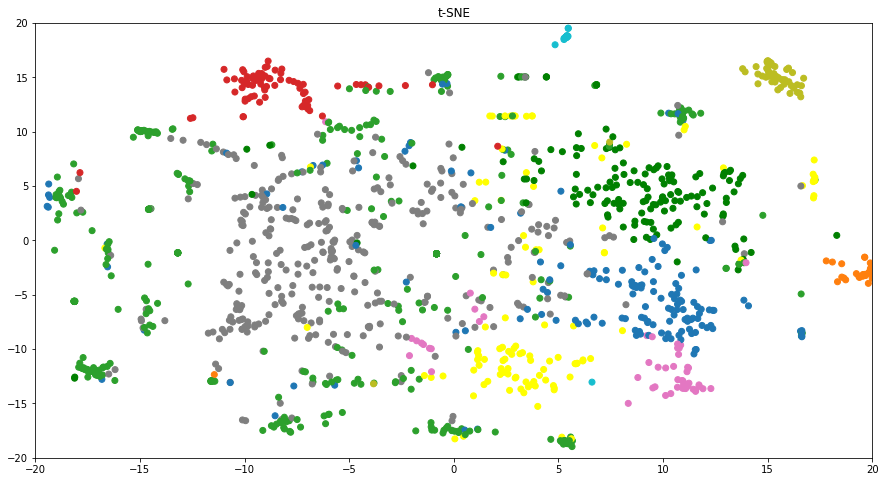

In [23]:
#plot TSNE for all clusters
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0,  method='exact')
Y = tsne.fit_transform(X)

fig = plt.figure(figsize=(15, 8))
plt.scatter(Y[:, 0], Y[:, 1], c=color_kmeans, cmap=plt.cm.Spectral)
plt.title("t-SNE" )
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

In [25]:
# thin out the data by only coloring articles of interest and keep track of celeb name for d3 plotting
celeb_cat = ['other' for i in range(len(article_list))]
color = ['white' for i in range(len(article_list))]
for i in range(len(article_list)):
    if any(substring in article_list[i].lower() for substring in ['chyna ', 'ferrari ']):
        color[i] = 'tab:red'
        celeb_cat[i] = 'rob & chyna'
    elif any(substring in article_list[i].lower() for substring in ['kim ', 'kanye ']):
        color[i] = 'tab:gray' 
        celeb_cat[i] = 'kim & kanye'
    elif any(substring in article_list[i].lower() for substring in ['bieb',]):
        color[i] = 'tab:orange'
        celeb_cat[i] = 'justin bieber'
    elif any(substring in article_list[i].lower() for substring in ['trump ', 'president ', 'donald ','prez ', 'scaramucci']):
        color[i] = 'tab:green'
        celeb_cat[i] = 'trump'
    elif any(substring in article_list[i].lower() for substring in ['corinne ', 'demario ', 'bachelor ']):
        color[i] = 'tab:blue' 
        celeb_cat[i] = 'bachelor pool scandal'
    elif any(substring in article_list[i].lower() for substring in ['floyd ', 'conor ' ,'mcgregor ', 'mayweather ']):
        color[i] = 'tab:purple'  
        celeb_cat[i] = 'mcgregor mayweather fight'
    elif any(substring in article_list[i].lower() for substring in ['chester ','cornell ' ,'bennington ', 'linkin ']):
        color[i] = 'tab:olive'  
        celeb_cat[i] = 'chester & chris cornell suicides'
    elif any(substring in article_list[i].lower() for substring in ['usher ', 'herpes ']):
        color[i] = 'tab:pink' 
        celeb_cat[i] = 'usher herpes scandal'
    elif any(substring in article_list[i].lower() for substring in ['cosby ']):
        color[i] = 'tab:cyan' 
        celeb_cat[i] = 'cosby trial'
    elif any(substring in article_list[i].lower() for substring in ['o.j. ']):
        color[i] = 'm' 
        celeb_cat[i] = 'o.j. simpson'


In [4]:
#see how many of each topic there are
from collections import Counter
Counter(celeb_cat)

Counter({'bachelor pool scandal': 45,
         'chester & chris cornell suicides': 27,
         'cosby trial': 21,
         'justin bieber': 38,
         'kim & kanye': 55,
         'mcgregor mayweather fight': 32,
         'o.j. simpson': 3,
         'other': 1118,
         'rob & chyna': 48,
         'trump': 109,
         'usher herpes scandal': 11})

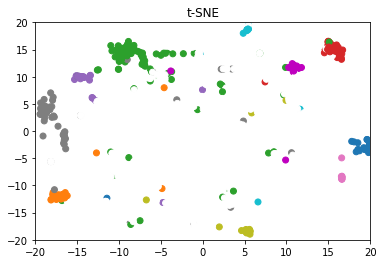

In [26]:
#plot the thinner TSNE
xpoints = []
ypoints = []
#color = []
for i in range(len(article_list)):
#    if color[i] != 'white':
        xpoints.append(Y[i, 0])
        ypoints.append(Y[i,1])
#        color.append(color[i])
plt.scatter(xpoints, ypoints, c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE" )
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

In [27]:
#make a csv for D3 plotting
df = pd.DataFrame(
    {'x': xpoints,
     'y': ypoints,
     'article': article_list,
     'celeb': celeb_cat
    })
df.iloc[100]
df = df[df['celeb']!= 'other']
df.shape
df.to_csv(path_or_buf = 'd3_celebrities/mycelebs.csv', index = False, header = ['article', 'celeb', 'x', 'y'])
df.head()

,article,celeb,x,y
3,The man who kept O.J. Simpson's getaway Bronco...,o.j. simpson,11.798806,11.694123
5,Usher isn't letting his herpes scandal get in ...,usher herpes scandal,16.638144,-8.499021
7,Gov. Terry McAuliffe has a clear message for D...,trump,-9.179421,15.342145
12,President Donald Trump's ex-campaign manager h...,trump,-9.201168,14.958587
14,"The Koch Brothers reportedly helped finance ""W...",trump,-10.982950,15.730076


12


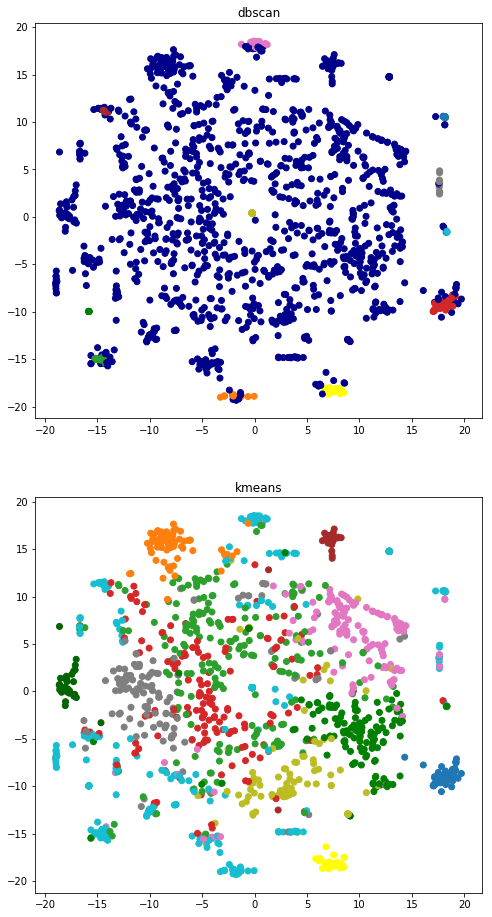

In [15]:
#what if you wanted to use DB Scan to cluster instead?
#Use DBSCan to cluster
pipe = [('tfidf', TfidfVectorizer(stop_words='english', 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b", 
                        min_df=10)),
        ('lsa', TruncatedSVD(50)),
        ('normalizer', Normalizer())]

pipeline = Pipeline(pipe)
pipeline.fit(article_list)
X = pipeline.fit_transform(article_list)
db = DBSCAN(eps=0.43, min_samples=10, metric = 'euclidean').fit(X)
km = KMeans(n_clusters=len(set(db.labels_))).fit(X)
print(len(set(db.labels_)))

colors = ['yellow', 'tab:gray', 'tab:olive', 'tab:green', 'tab:red', 'tab:cyan', 
          'tab:pink', 'tab:orange', 'green', 'tab:blue', 'brown', 'darkgreen', 'salmon', 'darkblue']
color_dbscan = [colors[label] for label in db.labels_]
color_kmeans = [colors[label] for label in km.labels_]

#plot TSNE for all clusters
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0,  method='exact')
Y = tsne.fit_transform(X)

%matplotlib inline
fig, axes = plt.subplots(2, 1, figsize=(8, 16))
axes[0].scatter(Y[:, 0], Y[:, 1], c=color_dbscan, cmap=plt.cm.Spectral)
axes[0].set(title='dbscan')
axes[1].scatter(Y[:, 0], Y[:, 1], c=color_kmeans, cmap=plt.cm.Spectral)
axes[1].set(title='kmeans')

In [11]:
#get most popular celeb names in TMZ articles for D3 word cloud
cv = CountVectorizer(stop_words='english', 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b", 
                        min_df=10, lowercase = False)

X = cv.fit_transform(article_list)
X = X.toarray()
df = pd.DataFrame(X,
             columns=cv.get_feature_names())
df = df.transpose()
#sums = df.transpose().sum(axis = 0)
df['sums'] = df.sum(axis = 1)
df = df['sums']
counts = {}
for i in range(len(df)):
    if df.index[i].istitle():
        if df.index[i] not in ['The', 'He','We', 'According', 'Hollywood' 'He', 'It', 'As', 'She', 'In', 'Thursday', 'Monday', 'Friday', 'Saturday',
                              'They', 'Wednesday', 'You', 'Sunday', 'Tuesday', 'Sports', 'Sources',
                              'White', 'But', 'And', 'There', 'Our', 'If', 'House', 'That', 'One',
                              'New', 'June', 'His', 'So', 'July', 'When', 'Law', 'American', 
                              'Hills', 'This', 'Park', 'No', 'County', 'Prodigy', 'Not', 'Warner', 'August',
                               'For', 'America', 'Still', 'London', 'Center', 'Bros', 'Live', 'Big', 'San',
                               'Mr', 'April', 'What', 'Dr', 'Ball', 'Atlanta', 'Now', 'Miami', 'City', 'Beach',
                               'At', 'York', 'On', 'My', 'October', 'Here', 'Florida', 'All', 'Washington',
                               'Just', 'February', 'March', 'California', 'While', 'Twitter', 'However', 'State',
                               'Purpose', 'Of', 'Malibu', 'King', 'Jr', 'Good', 'Georgia', 'Awards', 'Club', 'After']:
                            counts[df.index[i]]=df.values[i]
    
lst = list()
for key, val in counts.items():
    try:
        lst.append( (val, str(key) ))
    except:
        continue
    lst.sort(reverse=True)

for i in range(len(lst)):
    if lst[i][0]>20:
        print(lst[i])
        
x = sorted(counts, key=counts.get, reverse=True)
highest = None
lowest = None
for k in x[:100]:
    if highest is None or highest < counts[k] :
        highest = counts[k]
    if lowest is None or lowest > counts[k] :
        lowest = counts[k]
# Spread the font sizes across 20-100 based on the count
bigsize = 80
smallsize = 20

fhand = open('gossip.js','w')
fhand.write("gossip = [")
first = True
for k in x[:100]:
    if not first : fhand.write( ",\n")
    first = False
    size = counts[k]
    size = (size - lowest) / float(highest - lowest)
    size = int((size * bigsize) + smallsize)
    fhand.write("{text: '"+k+"', size: "+str(size)+"}")
fhand.write( "\n];\n")

print ("Output written to gossip.js")
fhand.close()

(207, 'Trump')
(198, 'Rob')
(195, 'Chyna')
(135, 'Chris')
(127, 'Corinne')
(118, 'Justin')
(105, 'Kim')
(101, 'President')
(98, 'Kelly')
(85, 'Kanye')
(83, 'Simpson')
(82, 'Chester')
(81, 'Kardashian')
(77, 'Jay')
(73, 'Bieber')
(71, 'Floyd')
(70, 'Venus')
(67, 'Jackson')
(65, 'Cosby')
(65, 'Conor')
(65, 'Blac')
(64, 'Hollywood')
(63, 'John')
(59, 'Aaron')
(57, 'Bachelor')
(55, 'Williams')
(54, 'Shia')
(54, 'Amber')
(52, 'Ryan')
(51, 'Usher')
(51, 'Mayweather')
(47, 'Cops')
(45, 'Vegas')
(45, 'Paradise')
(45, 'James')
(45, 'Donald')
(44, 'West')
(44, 'Michael')
(44, 'Jenner')
(44, 'Bill')
(42, 'Bennington')
(41, 'Joe')
(41, 'Ferrari')
(39, 'Kylie')
(39, 'Kendall')
(38, 'Olympios')
(38, 'Jones')
(38, 'Beyonce')
(37, 'Rachel')
(36, 'Tupac')
(36, 'Mike')
(35, 'Scott')
(35, 'Nick')
(35, 'Meek')
(35, 'May')
(35, 'Bella')
(34, 'George')
(34, 'Drake')
(34, 'David')
(34, 'Brown')
(33, 'Taylor')
(33, 'Savage')
(33, 'Cube')
(33, 'Bloom')
(32, 'Prez')
(31, 'Tom')
(30, 'Smith')
(30, 'Safaree')
(30

In [53]:
#get top celebrity tweeters
import pickle
tweet_list = pd.read_pickle('tweet_list.pkl')
tweet_list['celebrity'] = tweet_list['celebrity'].str.lower()
tweet_list.head()

,celebrity,tweet
0,katyperry,🇦🇺AUSTRALIA🇦🇺 Tickets &amp; VIP packages for n...
1,katyperry,Can’t wait to share the stage with all these a...
2,katyperry,#FBF: Who's getting excited for the #VMAs? 🙋🏼B...
3,katyperry,Auditions kick off on Aug 17 @DisneySprings! 🎤...
4,katyperry,🇦🇺 AUSTRALIA❗Your 1st chance for 🎟 to the new ...


In [57]:
len(set(tweet_list['celebrity']))

57

In [54]:
#group by celeb and calculate their positivity score

#clean up tweets by removing hyperlinks, hashtags, etc.
def remove_mypunct(corpus):

    corpus = map(lambda x: re.sub(r"(#|@|http)\S+", "", x), corpus) #get rid of hashtags 
    corpus = map(lambda x: re.sub(r"(\t|\n|\v|…|“|”)", "", x), corpus) #get rid of whitesape
    corpus = map(lambda x:  re.sub(r"""\w*\d\w*""", ' ', x.lower()), corpus) #get rid of numbers
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    corpus = map(lambda x: punc_re.sub(' ', x), corpus)
    corpus = map(lambda x: re.sub('[\W_]+', " ", x), corpus) #get rid of emojis

    return list(corpus)


names = set(tweet_list['celebrity'].values)
sentiment = []
for name in names:
    celeb_tweets = tweet_list[tweet_list['celebrity'] == name]['tweet']
    cleaned_up_tweets = remove_mypunct(celeb_tweets.values)
    #perform sentiment analysis
    compound_scores = []
    sid = SentimentIntensityAnalyzer()
    for sentence in cleaned_up_tweets:
        ss = sid.polarity_scores(sentence)
        compound_scores.append(float(ss['compound']))
    sentiment.append((np.mean(compound_scores), name))
sentiment.sort(reverse = True)
for celeb in sentiment:
    print(celeb)

(0.42542700000000006, 'actuallynph')
(0.3692088407005838, 'louis_tomlinson')
(0.3673526794742164, 'xtina')
(0.35785616666666664, 'theellenshow')
(0.35613067896060352, 'avrillavigne')
(0.35346747289407843, 'khloekardashian')
(0.3452982456140351, 'britneyspears')
(0.32938815679733108, 'cristiano')
(0.3213536666666667, 'billgates')
(0.31253585858585858, 'kevinhart4real')
(0.30251448911222778, 'harry_styles')
(0.30182073578595314, 'jtimberlake')
(0.3015826633165829, 'aliciakeys')
(0.2973490392648287, 'kingjames')
(0.29659799498746864, 'mariahcarey')
(0.2839514595496247, 'oprah')
(0.28088184902459717, 'ladygaga')
(0.27990468619246861, 'taylorswift13')
(0.26529832214765098, 'adele')
(0.26399233333333333, 'arianagrande')
(0.26214332220367281, 'ddlovato')
(0.26049095477386935, 'emmawatson')
(0.26023653044203504, 'ryanseacrest')
(0.25517808333333336, 'pitbull')
(0.25230144680851063, 'kyliejenner')
(0.2349787573467674, 'selenagomez')
(0.22746379598662206, 'pink')
(0.2251328607172644, 'aplusk')
(

In [55]:
#get snoop dogg's most negative tweets
snoop_tweets = tweet_list[tweet_list['celebrity'] == 'snoopdogg' ]['tweet']
clean_snoop_tweets = remove_mypunct(snoop_tweets.values)
compound_scores = []
for i, sentence in enumerate(clean_snoop_tweets):
        ss = sid.polarity_scores(sentence)
        compound_scores.append((float(ss['compound']), i,sentence))
compound_scores.sort()
for i in range(20):
    print(compound_scores[i][0])
    print(snoop_tweets[compound_scores[i][1]])

-0.6808
hell naw 😂 - @MERRYJANE https://t.co/S6Q0swki5a
-0.5859
Wtf?? Explains this 🤷🏾‍♂️🤷🏾‍♂️ https://t.co/uZEvpQGShS https://t.co/seqCqIFTvr
-0.5859
The All Eyez on Me Reviews Are Bullshit | L.A. Weekly https://t.co/jC5ZK3mDc8
-0.5859
Eat a snickers Bitch 🤣 https://t.co/h3SEpooAAN https://t.co/SfJ00b1eNI
-0.5574
Eastside Shit 👏🏾👏🏾💙 https://t.co/TpIBr0SWrD https://t.co/amb30wpUkD
-0.5574
Throwbac Kobe coat finals shit 🔥🔥👏🏾 https://t.co/lEtyRYjBzt https://t.co/Qt3NC45Ap2
-0.5574
Dubs up 90s shit https://t.co/Fz9Yb2T5VR https://t.co/dmwVQAtcbE
-0.5574
Bac on thy sosodef shit 🔥🔥🔥👊🏾 https://t.co/QnDmtOy0UJ https://t.co/cj4BPJK419
-0.5574
Met gala shit 🔥🔥. Empire. Wednesday https://t.co/RuUYimMZhp https://t.co/qkEK1KqFBY
-0.5423
Speed kills 🔥🔥🔥🔥 https://t.co/TA59kDUcNx https://t.co/UlGdseHA5Z
-0.4939
Video comin soon the moment I feared 🔥🔥🔥 https://t.co/8U6eLynspO https://t.co/AqRJjtYCI1
-0.4939
Hi. Haters 👏🏾👏🏾👏🏾🤣 https://t.co/kSiMTL6Cto https://t.co/QhuYXaxKNv
-0.4767
don’t believe the fa

In [57]:
#get neil patrick harris' most positive tweets
neil_tweets = tweet_list[tweet_list['celebrity'] == 'actuallynph' ]['tweet']
clean_neil_tweets = remove_mypunct(neil_tweets.values)
compound_scores = []
for i, sentence in enumerate(clean_neil_tweets):
        ss = sid.polarity_scores(sentence)
        compound_scores.append((float(ss['compound']), i,sentence))
compound_scores.sort(reverse = True)
for i in range(20):
    print(compound_scores[i][0])
    print(neil_tweets[compound_scores[i][1]])

0.9765
Happy Mother's Day. I am blessed with an absolutely fantastic mom - wonderful person, doting grandma, beautiful soul. I love her lots. 🌹
0.97
I had the great honor of presenting one of the @CNNHeroes Awards tonight. So inspiring, empowering, amazing. Please watch and support.
0.9636
A heartfelt HAPPY BIRTHDAY to the wonderful @DavidBurtka - the best dad in the world. I'm so glad you were born! http://t.co/KkdWZj0dkK
0.9601
Hope your 2014 is filled with many chapters of adventure, wisdom, and great good times! Happy New Year!!
0.9595
Happy Valentine's Day! Allow the love, find the love, make the love. Not necessarily in that order.
0.9578
It's my best friend @EdAlonzomagic 's birthday! He's awesome and magical and hilarious and deserves a shout out! Happy BD, ED!
0.9571
Excellent time in London seeing @Immersivegatsby. Great cast, great direction, Great Gatsby. Recommended!… https://t.co/DPWNsrnVmU
0.9565
So glad you had fun, mom. @BestTimeEver enjoyed watching you be wowed! Love

In [59]:
#pipeline practice

class Stemmer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        stemmer_fun = lambda x: list(map(self.stemmer.stem, x))
        Y = []
        for doc in X:
            string = ''
            for word in doc.split():
                string = ' '.join([string, stemmer_fun([word])[0]])
            Y.append(string)
        return Y

In [60]:
article_list = ['hi my names is dog rover', 'names are dogs, rover', 'clinton i am named dog', 'i like named dogs clinton']

pipe = [('lemmatizer', Stemmer()),
        ('tfidf', TfidfVectorizer(stop_words='english', 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b", 
                        min_df=2)),
       ('lsa', TruncatedSVD(2)),
        ('normalizer', Normalizer())]
pipeline = Pipeline(pipe)
pipeline.fit(article_list)
Y = pipeline.fit_transform(article_list)
http://0.0.0.0:8003/
print(Y)

#to get sentences out of lemmatizer
print(pipeline.steps[0][1].transform(article_list))

# to get words
for word in pipeline.steps[1][1].get_feature_names():
    print(word)

#to get vectors
pipeline.steps[1][1].transform(pipeline.steps[0][1].transform(article_list)).toarray()

[[ 0.80321268  0.59569236]
 [ 0.45963431  0.88810827]
 [ 0.88162807 -0.47194486]
 [ 0.88162807 -0.47194486]]
[' hi my name is dog rover', ' name are dogs, rover', ' clinton i am name dog', ' i like name dog clinton']
clinton
dog
rover


array([[ 0.        ,  0.62922751,  0.77722116],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.77722116,  0.62922751,  0.        ],
       [ 0.77722116,  0.62922751,  0.        ]])